# The OLG model with a PAYG system

This project aims to analyze the dynamics of capital accumulation in an OLG model, focusing on how the presence of a pay-as-you-go (PAYG) pension system and different population growth rates affect the steady-state level of capital per worker and.

The paper will follow the structure below:
1. Model description 
2. Analysis 
3. Model expansion
4. Conclusion

We start by importing the necesarry packages, then defining the relevant parameters into symbolic variables and then we solve for steady state.


In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import pandas as pd
from ipywidgets import interact, FloatSlider
import time
from scipy.optimize import root_scalar
import ipywidgets as widgets
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Model description

This sections aims to describe the OLG model and build upon it with the implementation of a pay as you go system. We describe the capital accumulation, population growth, firm's profit maximization and household utility and budget constraints. Then we will solve the household maximization problem and find the optimal savings and capital accumulation and finally find the steady state of the model.

### Capital accumulation

The OLG model consists of two periods and two groups: young and old. The production function is a standard Cobb-Douglas function:
$$
Y_{t}=AK_{t}^{\alpha}L_{t}^{1-\alpha}
$$


Capital accumulation is driven by the savings within the economy, contributed exclusively by the young:

$$
K_{t+1} = s_t L_t
$$



### Population growth
The labor force grows at a constant rate n:

$$
L_{t+1} = L_t (1 + n)
$$

## Firm's profit maximization
Firms aim to maximize their profits:

$$
\max_{K_t, L_t} \quad A K_t^\alpha L_t^{1-\alpha} - r_t K_t - w_t L_t
$$

where $r_t$ and $w_t$ are the factor prices. The standard solutions for factor prices in a Cobb-Douglas production function are:

$$
r_t = A \alpha k_t^{\alpha - 1}
$$

$$
w_t = A (1 - \alpha) k_t^\alpha
$$

with $A > 0$ being the factor productivity and $k_t$ being capital per worker, defined as $k_t = \frac{K_t}{L_t}$.



### Household utility and budget constraints
Individuals derive utility from consumption:

$$
U_t = \ln(c_{1t}) + \beta \ln(c_{2t+1})
$$

where $c_{1t}$ is consumption when young and $c_{2t+1}$ is consumption when old. The discount factor $\beta = \frac{1}{1 + \rho}$, with $\rho > -1$, ensures that $\beta$ is positive.

The budget constraints for the young and old are:

$$
c_{1t} + s_t = w_t
$$

$$
c_{2t+1} = (1 + r_{t+1}) s_t
$$

Young individuals consume their wages minus their savings, while the old consume their savings plus interest. This results in the lifetime budget constraint:

$$
c_{1t} + \frac{c_{2t+1}}{1 + r_{t+1}} = w_t
$$



### Solving the household maximization problem
To solve the household's utility maximization problem:

$$
\max_{c_{1t}, c_{2t+1}} \quad \ln(c_{1t}) + \beta \ln(c_{2t+1}) \quad \text{s.t.} \quad c_{1t} + \frac{c_{2t+1}}{1 + r_{t+1}} = w_t
$$

We use the Lagrangian method, resulting in the Euler equation:

$$
c_{2t+1} = \frac{1 + r_{t+1}}{1 + \rho} c_{1t}
$$



### Optimal savings and capital accumulation
Combining the Euler equation with the budget constraints, we find the optimal savings:

$$
s_t = \frac{1}{2 + \rho} w_t
$$

Given that $s_t = k_{t+1} (1 + n)$, we derive the capital accumulation per capita:

$$
k_{t+1} (1 + n) = \frac{1}{2 + \rho} w_t
$$

This simplifies to:

$$
k_{t+1} = \frac{A (1 - \alpha) k_t^\alpha}{(1 + n)(2 + \rho)}
$$

### Steady state
At the steady state, where $k_{t+1} = k_t = k^*$:

$$
k^* = \left(\frac{A (1 - \alpha)}{(1 + n)(2 + \rho)}\right)^{\frac{1}{1 - \alpha}}
$$

This completes the OLG model, showing how capital accumulates and the steady-state capital per worker is derived considering the savings behavior of the young and the factor prices in the economy. We want to prove that the steady state is given by $k^*$. We start by defining the parameters as symbolic variables.


In [2]:
alpha = sm.symbols('alpha')
rho =  sm.symbols('rho')
k = sm.symbols('k')
n = sm.symbols('n')
A = sm.symbols('A')
tau = sm.symbols('tau')

In [3]:
#We create a dataframe containing the relevant parameters and their respective values. It then rounds the values to two decimals 
#and displays the dataframe.
parameters = {
    'Parameter': ['alpha', 'rho', 'n', 'A','tau'],
    'Value': [1/3, 0.05, 0.06, 1, 0]
}
df = pd.DataFrame(parameters)
df['Value'] = df['Value'].round(2)
df

,Parameter,Value
0,alpha,0.33
1,rho,0.05
2,n,0.06
3,A,1.00
4,tau,0.00


$\alpha$ represents the share of output attributed to capital. The value 0.33 is empirically observed as a reasonable estimate for the capital share of income in many economies.

$\rho$ is the discount rate reflecting the time preference of individuals. It indicates how future utility or consumption is valued relative to present utility or consumption. The value of 5% is a typical assumption to reflect moderate time preference, meaning individuals moderately prefer current consumption over future consumption.

$n$ is the population growth rate. In the OLG model, this parameter affects the growth of the labor force and, consequently, the capital per worker and output per worker over time. A 6% growth rate is considered high by contemporary global standards, where many developed countries have growth rates below 2%. Therefore n reflects a high population growth rate in our model.

$A$ represents total factor productivity, a measure of the efficiency with which capital and labor are used to produce output. Setting 
A to 1 normalizes the model, making it easier to isolate and analyze the effects of other variables and parameters.

$\tau$ can represent taxes, subsidies, or other policy-related parameters. A value of 0 implies a baseline scenario without taxes or subsidies.

We now set up the steady state condition and solve for for $k$:

In [4]:
ss = sm.Eq(k, (A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))
ss

Eq(k, A*k**alpha*(1 - alpha)/((n + 1)*(rho + 2)))

In [5]:
ss_solve = sm.solve(ss, k)[0]
ss_solve

(A*(1 - alpha)/(n*rho + 2*n + rho + 2))**(-1/(alpha - 1))

Which is equal to the steady state that we defined earlier. We now move on to the solution.

# Analysis

In this section, we will analyze the steady-state level of capital per capita in the OLG model. Additionally, we will explore the dynamics of capital accumulation. 

Since 
$𝑘_{𝑡+1}$ is a concave function of $𝑘_{𝑡}$, a unique steady state exists, and the system will converge to it over time. To determine the steady state level, we subtract the right-hand side from the left-hand side of the capital accumulation equation. This yields a function that needs to be optimized. We utilize the root_scalar function to find the root of this function, which represents the point where the function equals zero and thus identifies the steady state.

In [6]:
#We define the parameters again as we now make numerical calculations and simulations.
A = 1.0
alpha = 1/3
rho = 0.05 
n = 0.06

We perform an analysis of the steady-state level of capital per capita in the model: 

In [7]:
#We define symbols for symbolic computation
alpha_sym, rho_sym, k_sym, n_sym, A_sym = sm.symbols('alpha rho k n A')

#We define the steady state equation. The left side of the equation represents the steady-state capital per capita 
#and the right side represents the production function adjusted for population growth and discount rate
ss_eq = sm.Eq(k_sym, (A_sym * (1 - alpha_sym) * k_sym**alpha_sym) / ((1 + n_sym) * (2 + rho_sym)))

#We solve for steady state capital per capita symbolically
ss_solve = sm.solve(ss_eq, k_sym)[0]

#We convert the solution to a numerical function
k_solve = sm.lambdify((alpha_sym, rho_sym, n_sym, A_sym), ss_solve)

#We calculate steady state capital per capita with given parameter values
k_star = k_solve(alpha, rho, n, A)
print(f'Steady state capital per capita: {k_star:.3f}')

#We define the objective function for numerical solution. The function represents the difference between k
#and the production function, which should be zero at the steady-state.
def obj(k):
    return k - (A * (1 - alpha) * k**alpha) / ((1 + n) * (2 + rho))

#We optimize the model and find the roots. The root finder solves for the steady-state.
result = root_scalar(obj, bracket=[1e-10, 10], method='bisect')
k_star_numerical = result.root
print(f'Numerical steady state capital per capita: {k_star_numerical:.3f}')

Steady state capital per capita: 0.170
Numerical steady state capital per capita: 0.170


0.17 represents the steady-state level of capital per worker $k$ in the OLG model, given the specific values for the parameters. Therefore, the economy will stabilize at a level where each worker has approximately 0.17 units of capital in the long run. 

We now simulate the capital accumulation over time and then visualize the growth path:

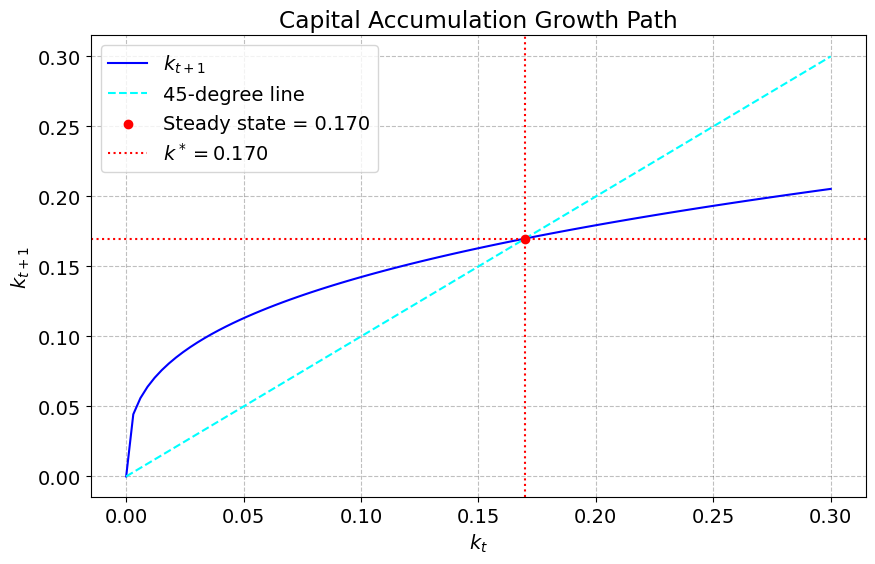

In [8]:
#We simulate the model over 50 periods. We initialize the capital per capita at t=0
#and calculate the capital per capita for each subsequent period using the production function.
periods = 50
k_path = np.zeros(periods)
k_path[0] = 0.1
for t in range(1, periods):
    k_path[t] = (A * (1 - alpha) * k_path[t-1]**alpha) / ((1 + n) * (2 + rho))

#We plot the capital accumulation growth path
k_vals = np.linspace(0, 0.3, 100)
k_next_vals = (A * (1 - alpha) * k_vals**alpha) / ((1 + n) * (2 + rho))

plt.figure(figsize=(10, 6))
plt.plot(k_vals, k_next_vals, label='$k_{t+1}$', color='blue')
plt.plot(k_vals, k_vals, label='45-degree line', color='cyan', linestyle='--')
plt.scatter(k_star, k_star, color='red', zorder=5, label=f'Steady state = {k_star:.3f}')
plt.axvline(x=k_star, color='red', linestyle=':', label=f'$k^* = {k_star:.3f}$')
plt.axhline(y=k_star, color='red', linestyle=':')
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.title('Capital Accumulation Growth Path')
plt.legend()
plt.grid(True)
plt.show()


The blue curve's shape indicates how the capital per worker will evolve over time. The 45 degree line represents the equation $k_t=k_{t+1}$. The points where the blue curve intersects the 45-degree line indicate the steady-state levels of capital per worker. If the current capital per worker $k_t$ is below the steady-state level, the capital will increase in the next period $k_{t+1}>k_t$. Conversely, if $k_t$ is above the steady-state level, the capital will decrease $k_{t+1}<k_t$. The red dot marks the steady-state level of capital per worker, which is approximately $k^*=0.17$. This is the point where the capital per worker remains constant over time, meaning the economy has reached equilibrium.

# Model expansion

#### Effect of Implementing a Pay-As-You-Go (PAYG) System

In this section, we will adopt a different approach to solve the model by examining the PAYG system. Here’s a brief explanation of the PAYG system:

In a PAYG system, the government collects contributions $d_t$ from the current young population and distributes them as benefits to the current old population:
$$
b_t = (1 + n) d_t
$$

Assuming contributions are a fixed fraction of wages ($d_t = \tau w_t$), the budget constraints for the young and old are given by:
$$
c_{1t} + s_t + d_t = w_t
$$
for the young, and:
$$
c_{2t+1} = (1 + r_{t+1}) s_t + (1 + n) d_{t+1}
$$
for the old.

The Euler equation remains unchanged as the contributions are taken as given. Savings can be expressed as:
$$
s_t = (1 + n) k_{t+1}
$$

We can derive the closed-form expression for individual savings:
$$
s_t = \frac{1}{2 + \rho} \left[ (w_t - d_t) - \frac{1 + \rho}{r_{t+1}} (1 + n) d_{t+1} \right]
$$

Similarly, the equilibrium expression for $k_{t+1}$ is:
$$
k_{t+1} = \frac{1}{1 + \frac{1 + \rho}{2 + \rho} \frac{(1 - \alpha)}{\alpha} \tau} \left( \frac{1}{(1 + n)(2 + \rho)} (1 - \tau) w_t \right)
$$


We now define the new parameters in the PAYG system:

The value of $\beta$ represents how individuals value future consumption relative to current consumption. A value of 0.96 implies that individuals value future consumption at 96% of current consumption. This reflects a moderate preference for current consumption over future consumption.

The discount rate $\rho$ is derived from the discount factor and represents the rate at which future utilities or returns are discounted back to the present. A discount rate of approximately 4.17% indicates the rate at which future benefits are discounted to equate them to present benefits.

The PAYG tax rate $\tau$ is the proportion of current workers' income that is taxed to finance the pensions of the retired generation. A tax rate of 15% means that 15% of the income of the working population is collected and transferred to the retired population.

In [9]:
beta = 0.96  
rho = (1 / beta) - 1 
tau = 0.15 

We analyze the steady-state levels of capital per capita in the OLG model with and without a PAYG system. We compare the dynamics of capital accumulation under both scenarios by finding the steady-state solutions.

In [10]:
#Production function: We calculate the output based on capital per worker.
def production_function(k):
    return A * k ** alpha

#Wage function: We calculate the wage rate based on capital per worker.
def wage_function(k):
    return A * (1 - alpha) * k ** alpha

#Capital accumulation function without PAYG: We calculate the next period's capital per worker without the PAYG system.
def capital_accumulation_without_PAYG(k):
    return (A * (1 - alpha) * k ** alpha) / ((1 + n) * (2 + rho))

#Capital accumulation function with PAYG: We calculate the next period's capital per worker with the PAYG system.
def capital_accumulation_with_PAYG(k):
    w = wage_function(k)
    return (A * (1 - alpha) * (1 - tau) * k ** alpha) / ((1 + n) * (2 + rho) * (1 + ((1 + rho) / (2 + rho)) * ((1 - alpha) / alpha) * tau))

#Objective function for numerical solution: We define the objective functions for finding the steady-state capital 
#levels by subtracting the next period's capital from the current period's capital.
def obj_without_PAYG(k):
    return k - capital_accumulation_without_PAYG(k)
def obj_with_PAYG(k):
    return k - capital_accumulation_with_PAYG(k)

#We now find the steady states.
k_star_without_PAYG = root_scalar(obj_without_PAYG, bracket=[1e-10, 10], method='bisect').root
k_star_with_PAYG = root_scalar(obj_with_PAYG, bracket=[1e-10, 10], method='bisect').root

print(f'Steady state capital per capita without PAYG: {k_star_without_PAYG:.3f}')
print(f'Steady state capital per capita with PAYG: {k_star_with_PAYG:.3f}')

Steady state capital per capita without PAYG: 0.171
Steady state capital per capita with PAYG: 0.108


0.17 represents the steady-state level of capital per worker $k$ in the OLG model without the PAYG system and 0.108 represents the steady-state with the PAYG system. Therefore, the presence of a PAYG system reduces the steady-state capital per worker.

We simulate the capital accumulation paths, and visualize the results below.

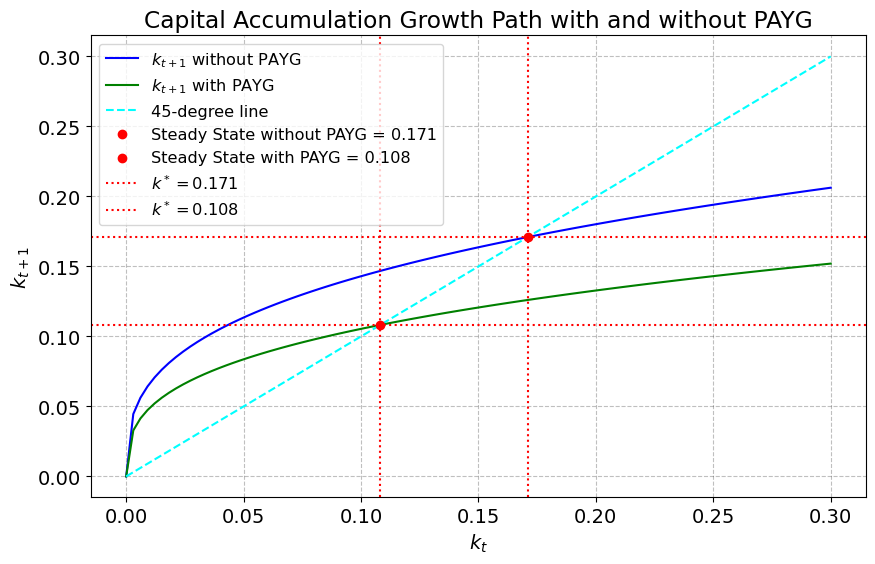

In [11]:
#We simulate the model with and without the payg system.
periods = 50
k_path_without_PAYG = np.zeros(periods)
k_path_with_PAYG = np.zeros(periods)
k_path_without_PAYG[0] = 0.1  
k_path_with_PAYG[0] = 0.1  

for t in range(1, periods):
    k_path_without_PAYG[t] = capital_accumulation_without_PAYG(k_path_without_PAYG[t-1])
    k_path_with_PAYG[t] = capital_accumulation_with_PAYG(k_path_with_PAYG[t-1])

#We plot the capital accumulation growth path.
k_vals = np.linspace(0, 0.3, 100)
k_next_vals_without_PAYG = capital_accumulation_without_PAYG(k_vals)
k_next_vals_with_PAYG = capital_accumulation_with_PAYG(k_vals)

plt.figure(figsize=(10, 6))
plt.plot(k_vals, k_next_vals_without_PAYG, label='$k_{t+1}$ without PAYG', color='blue')
plt.plot(k_vals, k_next_vals_with_PAYG, label='$k_{t+1}$ with PAYG', color='green')
plt.plot(k_vals, k_vals, label='45-degree line', color='cyan', linestyle='--')
plt.scatter(k_star_without_PAYG, k_star_without_PAYG, color='red', zorder=5, label=f'Steady State without PAYG = {k_star_without_PAYG:.3f}')
plt.scatter(k_star_with_PAYG, k_star_with_PAYG, color='red', zorder=5, label=f'Steady State with PAYG = {k_star_with_PAYG:.3f}')
plt.axvline(x=k_star_without_PAYG, color='red', linestyle=':', label=f'$k^* = {k_star_without_PAYG:.3f}$')
plt.axvline(x=k_star_with_PAYG, color='red', linestyle=':', label=f'$k^* = {k_star_with_PAYG:.3f}$')
plt.axhline(y=k_star_without_PAYG, color='red', linestyle=':')
plt.axhline(y=k_star_with_PAYG, color='red', linestyle=':')
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.title('Capital Accumulation Growth Path with and without PAYG')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()


Without PAYG the steady-state capital per worker is approximately $k^*=0.171$. This is the level where capital accumulation stabilizes without the influence of the PAYG system. With PAYG the steady-state capital per worker is lower, $k^*=0.108$. This reduction is due to the PAYG tax rate $\tau=0.15$, which decreases the disposable income of the working generation, thereby reducing their savings and the overall capital accumulation. Therefore, the presence of a PAYG system reduces the steady-state capital per worker because a portion of the workers' income is transferred to retirees, decreasing the amount available for savings and investment. The graph clearly shows that the curve with PAYG lies below the curve without PAYG, indicating lower capital accumulation in each period when the PAYG system is in place. This highlights the trade-off between providing for current retirees and maintaining higher levels of capital for future economic growth. 

We now analyze the effect of different population growth rates on the steady-state level of capital per capita in the OLG model and we find the steady-state solutions for three different population growth rates. We will examine the original growth rate $n=0.06$ and now also $n=0.10$ and a negative rate $n=-0.05$. This analysis is the OLG model without the PAYG system. We start by defining them:

In [14]:
n_old = 0.06  
n_new = 0.10 
n_neg = -0.05  

We now find the steady-levels with each population growth:

In [17]:
# Production function
def production_function(k):
    return A * k ** alpha

# Capital accumulation function
def capital_accumulation(k, n):
    return (A * (1 - alpha) * k ** alpha) / ((1 + n) * (2 + rho))

# Objective function for numerical solution
def obj(k, n):
    return k - capital_accumulation(k, n)

# Find the steady states
k_star_old = root_scalar(obj, args=(n_old,), bracket=[1e-10, 10], method='bisect').root
k_star_new = root_scalar(obj, args=(n_new,), bracket=[1e-10, 10], method='bisect').root
k_star_neg = root_scalar(obj, args=(n_neg,), bracket=[1e-10, 10], method='bisect').root

print(f'Steady state capital per capita (n = {n_old}): {k_star_old:.3f}')
print(f'Steady state capital per capita (n = {n_new}): {k_star_new:.3f}')
print(f'Steady state capital per capita (n = {n_neg}): {k_star_neg:.3f}')

Steady state capital per capita (n = 0.06): 0.171
Steady state capital per capita (n = 0.1): 0.162
Steady state capital per capita (n = -0.05): 0.202


With a population growth rate of 6%, the economy reaches a steady-state where each worker has 0.171 of capital. With an increased population growth rate of 10%, the steady-state capital per worker decreases to 0.162. The higher population growth rate puts more pressure on the capital stock, reducing the amount of capital available per worker in the long run. With a negative population growth rate of -5%, the steady-state capital per worker increases to 0.202. The declining population means there are fewer workers to share the capital stock, resulting in higher capital per worker in the steady state.

We now simulate the capital accumulation paths and visualize the results.

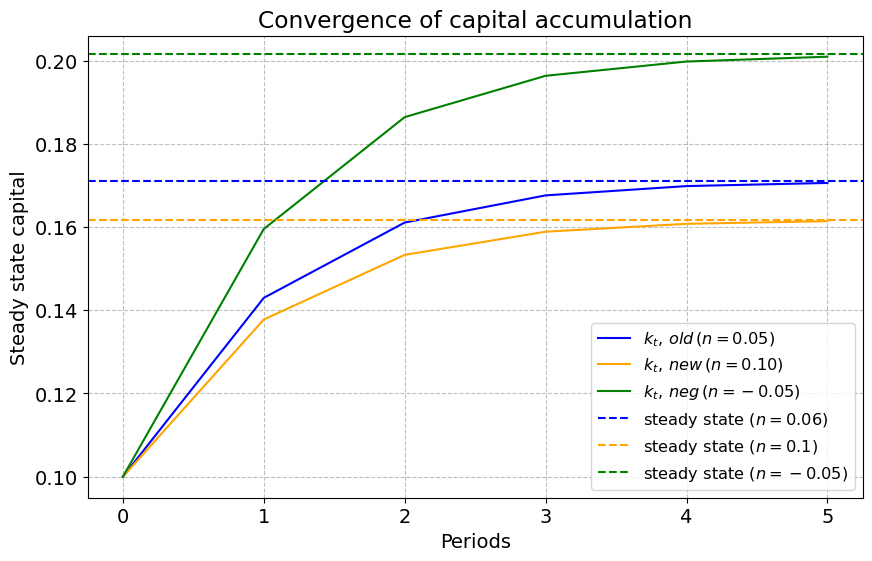

In [19]:
#We simulate the model
periods = 6
k_path_old = np.zeros(periods)
k_path_new = np.zeros(periods)
k_path_neg = np.zeros(periods)
k_path_old[0] = 0.1  
k_path_new[0] = 0.1  
k_path_neg[0] = 0.1  

for t in range(1, periods):
    k_path_old[t] = capital_accumulation(k_path_old[t-1], n_old)
    k_path_new[t] = capital_accumulation(k_path_new[t-1], n_new)
    k_path_neg[t] = capital_accumulation(k_path_neg[t-1], n_neg)

#We plot the capital accumulation growth path
plt.figure(figsize=(10, 6))
t = np.arange(periods)
plt.plot(t, k_path_old, label=r'$k_t, \, old \, (n = 0.05)$', color='blue')
plt.plot(t, k_path_new, label=r'$k_t, \, new \, (n = 0.10)$', color='orange')
plt.plot(t, k_path_neg, label=r'$k_t, \, neg \, (n = -0.05)$', color='green')
plt.axhline(k_star_old, color='blue', linestyle='--', label=f'steady state $(n = {n_old})$')
plt.axhline(k_star_new, color='orange', linestyle='--', label=f'steady state $(n = {n_new})$')
plt.axhline(k_star_neg, color='green', linestyle='--', label=f'steady state $(n = {n_neg})$')
plt.xlabel('Periods')
plt.ylabel('Steady state capital')
plt.title('Convergence of capital accumulation')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()


The graph demonstrates the impact of different population growth rates on capital accumulation. For a moderate population growth rate (n = 0.06), the economy converges to a steady-state capital per capita of approximately 0.17. A higher population growth rate (n = 0.10) results in a lower steady-state capital per capita of around 0.15 due to increased resource demands. Conversely, a negative population growth rate (n = -0.05) leads to a higher steady-state capital per capita of approximately 0.21, as fewer resources are needed for the declining population. Therefore, higher population growth rates reduce the steady-state capital per worker, while negative population growth rates increase it. These results underscore the significant influence of population dynamics on capital accumulation and economic stability.

# Conclusion



We demonstrate that it is possible to determine the steady-state level of capital accumulation in an OLG model both numerically and analytically. Our analysis shows that the baseline model achieves a steady state of approximately 0.17. By extending the model to include a PAYG system, we observe a reduced level of capital accumulation, attributed to the lower disposable income for the young generation. Additionally, we varied the population growth rates, revealing a negative relationship between population growth and capital accumulation. Therefore, we determined that increasing population growth rates and implementing a PAYG system both reduce the steady-state capital per worker, illustrating the impact of demographic changes and pension policies on long-term economic equilibrium.